In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import sys

sys.path.append('../')

In [3]:
from src.data import create_dataset, clean_dataset
from src.utils import *

In [4]:
np.random.seed(17)

In [5]:
%%time

data_path = '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE'
df = create_dataset(data_path=data_path)

found 8 files
number Na in df: 1358
CPU times: user 18.7 s, sys: 4.32 s, total: 23.1 s
Wall time: 23.1 s


In [6]:
%%time

df = clean_dataset(df)

CPU times: user 3.43 s, sys: 2.39 s, total: 5.81 s
Wall time: 5.81 s


In [7]:
df.sample(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_bin,Label_encoded,Label_str
1769043,53,69464,1,1,39,249,39,39,39.000000,0.000000,...,0.000,0,0,0.0,0.0000,0,0,0,0,BENIGN
2181015,45221,80,1,1,0,0,0,0,0.000000,0.000000,...,0.000,0,0,0.0,0.0000,0,0,0,0,BENIGN
444807,2038,48,1,1,0,6,0,0,0.000000,0.000000,...,0.000,0,0,0.0,0.0000,0,0,1,10,PortScan
478587,1096,54,1,1,2,6,2,2,2.000000,0.000000,...,0.000,0,0,0.0,0.0000,0,0,1,10,PortScan
1464355,443,115227321,26,19,3183,4147,670,0,122.423077,229.290239,...,2183974.224,4935940,50478,10100000.0,218053.1732,10200000,9484556,0,0,BENIGN


In [8]:
label_cols = [c for c in df.columns if 'Label' in c]
label_cols

['Label_bin', 'Label_encoded', 'Label_str']

In [9]:
X, y = df.drop(label_cols, axis=1), df['Label_bin']


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [13]:
from catboost import CatBoostClassifier

In [14]:
from catboost import metrics
from sklearn.metrics import accuracy_score

In [15]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy(), metrics.Recall(), metrics.Precision()],
    random_seed=42,
    logging_level='Silent'
)

In [16]:
model.fit(
    X_train, y_train,
#     cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    early_stopping_rounds=300,
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [18]:
pred_proba = model.predict_proba(X_test)
pred_proba = pred_proba[:, 1]

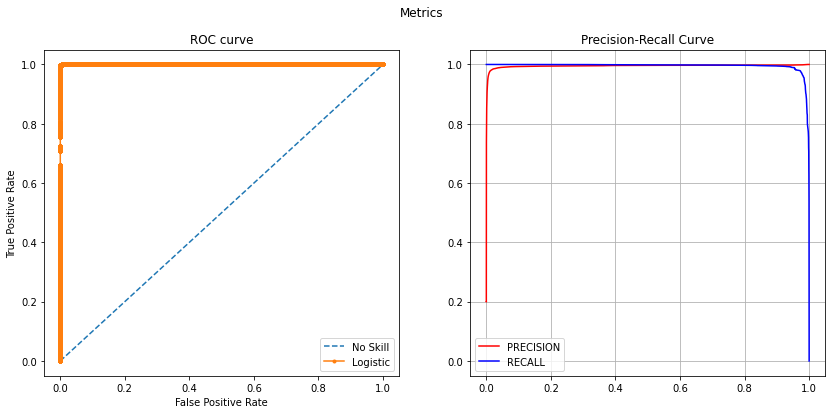

In [19]:
print_corves(pred_proba, y_test)

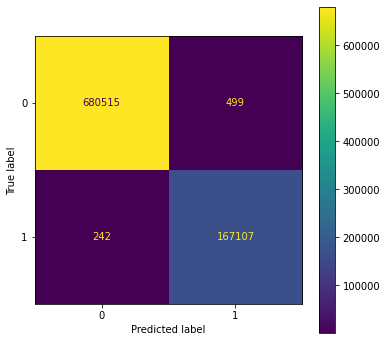

In [20]:
pred = model.predict(X_test)
plot_confusion_matrix(y_test, pred)

In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    681014
           1       1.00      1.00      1.00    167349

    accuracy                           1.00    848363
   macro avg       1.00      1.00      1.00    848363
weighted avg       1.00      1.00      1.00    848363

